<a href="https://colab.research.google.com/github/Radel-24/crowd_path/blob/main/crowd_path.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Settings
for the first run, install the needed modules

In [ ]:
#!pip install lwcc
#!pip install Dijkstar

set the path to the image

In [ ]:
path = "/content/drive/MyDrive/Colab_Notebooks/test/video_scale2.jpg"

provide the coordinates of the start and end position

In [ ]:
start_position = (2,2)
end_position = (75,75)

# AI for getting the crowd density

creating the density map of the picture

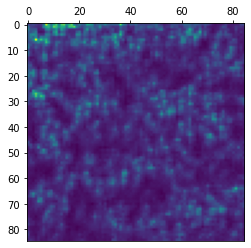

In [ ]:
from lwcc import LWCC
import matplotlib.pyplot as plt

img = path
count, density = LWCC.get_count(img, return_density = True, model_weights = "SHA", resize_img= False)
plt.imshow(density)

In [ ]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
i = 0
with open('/content/density_map.data', 'w') as f:
        print(density, file=f)

# Path calculation

to install the path finding module, uncomment the next line

In [ ]:
import sys
import numpy as np
import math
import matplotlib.pyplot as plt
import dijkstar
from dijkstar.graph import Graph
from dijkstar.algorithm import find_path
import json

density_array = density
density_array = [[j*100 for j in i] for i in density_array]
density_array = np.array(density_array)
#print(density_array)

def create_edges(my_graph, density_array):
  rows = density_array.shape[0]
  columns = density_array.shape[1]
  #print("debug %s, %s" %(rows, columns))
  for row in range(rows):
    for column in range(columns):
      my_graph.add_edge((column, row), (column + 1, row), (density_array[row, column], 'right'))
      my_graph.add_edge((column, row), (column, row + 1), (density_array[row, column], 'bottom'))
      my_graph.add_edge((column + 1, row), (column, row), (density_array[row, column], 'left'))
      my_graph.add_edge((column, row + 1), (column, row), (density_array[row, column], 'up'))

def cost_func(u, v, edge, prev_edge):
  length, name = edge
  if prev_edge:
      prev_name = prev_edge[1]
  else:
      prev_name = None
  cost = length
  if name != prev_name:
      cost += 1
  return cost

#defining going to east as 0 degree and a positive angle in clock direction
def direction(cur_pos, path, phone_orient, lookahead):
  x_offset = path[lookahead][0] - cur_pos[0]
  y_offset = path[lookahead][1] - cur_pos[1]
  print(x_offset, y_offset)
  angle = math.tan(y_offset/(x_offset + 0.00001)) 
  print(angle)

def save_output(output):
  with open('output.json', 'w') as f:
    json.dump(output, f)

my_graph = Graph()
create_edges(my_graph, density_array)
my_path = find_path(my_graph, start_position, end_position, cost_func=cost_func)
my_path = my_path.nodes
x_len = density_array.shape[1]
y_len = density_array.shape[0]
save_output(my_path)
print(my_path)
direction((0,0), my_path, 5, 4)

[(2, 2), (3, 2), (4, 2), (4, 3), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9), (9, 10), (9, 11), (9, 12), (9, 13), (9, 14), (9, 15), (9, 16), (9, 17), (9, 18), (10, 18), (11, 18), (12, 18), (13, 18), (13, 19), (13, 20), (13, 21), (13, 22), (13, 23), (13, 24), (13, 25), (14, 25), (14, 26), (14, 27), (14, 28), (14, 29), (14, 30), (14, 31), (14, 32), (13, 32), (13, 33), (13, 34), (13, 35), (13, 36), (13, 37), (13, 38), (13, 39), (13, 40), (13, 41), (13, 42), (13, 43), (13, 44), (13, 45), (13, 46), (13, 47), (13, 48), (14, 48), (15, 48), (16, 48), (17, 48), (18, 48), (19, 48), (19, 49), (19, 50), (19, 51), (19, 52), (19, 53), (19, 54), (19, 55), (19, 56), (19, 57), (20, 57), (20, 58), (20, 59), (20, 60), (20, 61), (20, 62), (20, 63), (20, 64), (20, 65), (20, 66), (20, 67), (20, 68), (20, 69), (21, 69), (22, 69), (23, 69), (24, 69), (25, 69), (26, 69), (27, 69), (28, 69), (29, 69), (30, 69), (31, 69), (32, 69), (33, 69), (34, 69), (35, 69), (35, 68)

just showing the path in a plot for debugging

In [ ]:
#output = my_path
#scale_factor = 680
#xmin, xmax = plt.xlim()
#ymin, ymax = plt.ylim()
#plt.xlim(xmin * scale_factor, xmax * scale_factor)
#plt.ylim(ymin * scale_factor, ymax * scale_factor)
#output = [[j*9 for j in i] for i in output]
#xy2=zip(*output)
#plt.plot(*xy2, color='red', linewidth=2.0)
#plt.grid()
#plt.gca().invert_yaxis()
#plt.show()

# Visualisation

calculation the scaling factor for the path to fit to the original image

In [ ]:
from PIL import Image

image_data = Image.open(path)
width, height = image_data.size

x_scale = width / x_len
y_scale = height / y_len

8.0 8.0


creating the output

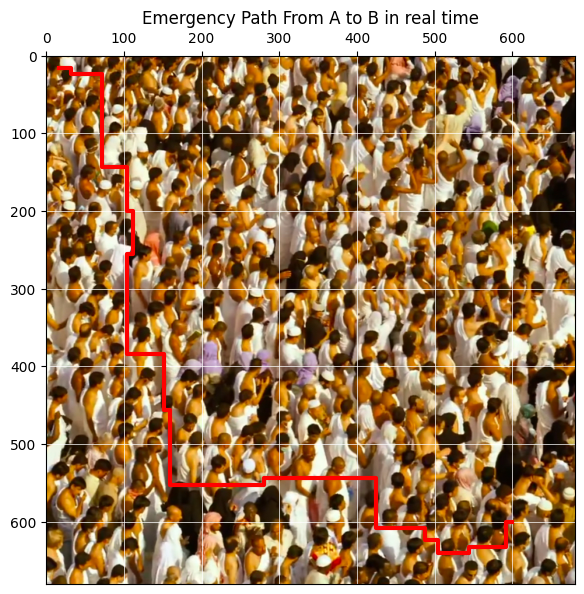

In [ ]:
import numpy as np
import cv2
import argparse
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from PIL import Image, ImageOps
import plotly.graph_objects as go
import json

im = Image.open(path)
im_flip = ImageOps.flip(im)

with open('output.json') as json_file:
    data = json.load(json_file)
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

data = [[j*x_scale for j in i] for i in data]
xy=zip(*data)

image_data = Image.open(path)
width, height = image_data.size
img = plt.imread(path)
#im_flip = cv2.applyColorMap(im_flip, cv2.COLORMAP_OCEAN)
fig, ax = plt.subplots(figsize=(12, 7), dpi=100)
ax.imshow(im_flip, extent=[0, width, 0, height])
plt1.plot(*xy, color='red', linewidth=3.0, linestyle='-')


plt.grid(color='white', linestyle='-', linewidth=0.5)
ax.set_title('Emergency Path From A to B in real time')
plt.gca().invert_yaxis()
plt.show()